In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [2]:
train_data = pd.read_csv('dogs_n_cats.csv')
train_data.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид
0,15,18.0,1,1,0,собачка
1,20,24.0,1,0,0,собачка
2,34,40.8,1,1,0,собачка
3,26,31.2,1,1,0,собачка
4,16,19.2,1,1,0,собачка


In [3]:
train_data.isnull().sum()

Длина                 0
Высота                0
Шерстист              0
Гавкает               0
Лазает по деревьям    0
Вид                   0
dtype: int64

In [4]:
train_data = train_data.rename(columns = {'Длина' : 'Length',
                                          'Высота' : 'Height',
                                          'Шерстист' : 'Woolliness', 
                                          'Гавкает' : 'Barking',
                                          'Лазает по деревьям' : 'Climbing',
                                          'Вид' : 'Type'})

In [5]:
train_data.head()

,Length,Height,Woolliness,Barking,Climbing,Type
0,15,18.0,1,1,0,собачка
1,20,24.0,1,0,0,собачка
2,34,40.8,1,1,0,собачка
3,26,31.2,1,1,0,собачка
4,16,19.2,1,1,0,собачка


In [6]:
train_data.groupby('Type').count()

,Length,Height,Woolliness,Barking,Climbing
Type,,,,,
котик,500,500,500,500,500
собачка,500,500,500,500,500


In [7]:
y = train_data[['Type']]
X = train_data.drop(['Type'], axis=1)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [9]:
X_train.head()

,Length,Height,Woolliness,Barking,Climbing
703,13,5.2,1,0,1
311,34,40.8,1,1,0
722,5,2.0,1,1,0
629,9,3.6,1,0,1
0,15,18.0,1,1,0


In [10]:
max_depth_values = range(1, 100)
scores_data = pd.DataFrame()

In [11]:
for max_depth in max_depth_values:
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    temp_score_data = pd.DataFrame({'max_depth' : [max_depth], 
                                    'train_score' : [train_score],
                                    'test_score' : [test_score],
                                    'cross_val_score' : [mean_cross_val_score]})
    scores_data = scores_data.append(temp_score_data)

In [12]:
scores_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,1.0,1.0,1.0
0,2,1.0,1.0,1.0
0,3,1.0,1.0,1.0
0,4,1.0,1.0,1.0
0,5,1.0,1.0,1.0


In [13]:
scores_data_long = scores_data.melt(id_vars=['max_depth'], 
                                    value_vars=['train_score', 'test_score', 'cross_val_score'], 
                                   var_name='set_type', value_name='score')

In [14]:
scores_data_long.query("set_type == 'cross_val_score'").head()

,max_depth,set_type,score
198,1,cross_val_score,1.0
199,2,cross_val_score,1.0
200,3,cross_val_score,1.0
201,4,cross_val_score,1.0
202,5,cross_val_score,1.0


<AxesSubplot:xlabel='max_depth', ylabel='score'>

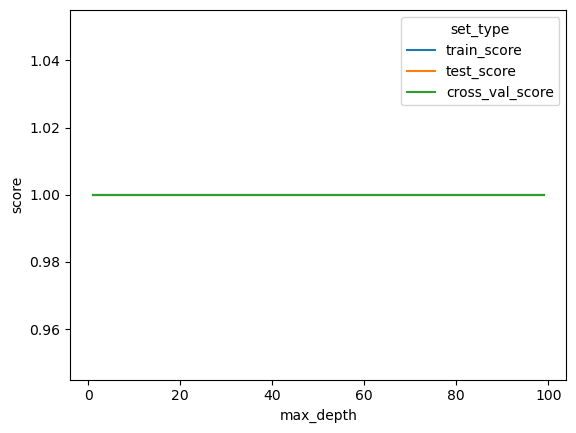

In [15]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)


In [17]:
best_clf = DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [41]:
best_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [42]:
cross_val_score(best_clf, X_test, y_test, cv=5).mean()

1.0

In [38]:
data = 'dataset_209691_15.txt'

In [56]:
def count(data):
    test_data = pd.read_json(data)
    test_data = test_data.rename(columns = {'Длина' : 'Length',
                                          'Высота' : 'Height',
                                          'Шерстист' : 'Woolliness', 
                                          'Гавкает' : 'Barking',
                                          'Лазает по деревьям' : 'Climbing'})
    return best_clf.predict(test_data)

In [57]:
count(data)

array(['собачка', 'собачка', 'собачка', 'собачка', 'собачка', 'собачка',
       'собачка', 'собачка', 'собачка', 'собачка', 'собачка', 'собачка',
       'собачка', 'собачка', 'собачка', 'собачка', 'собачка', 'собачка',
       'собачка', 'собачка', 'собачка', 'собачка', 'собачка', 'собачка',
       'собачка', 'собачка', 'собачка', 'собачка', 'собачка', 'собачка',
       'собачка', 'собачка', 'собачка', 'собачка', 'собачка', 'собачка',
       'собачка', 'собачка', 'собачка', 'собачка', 'котик', 'котик',
       'котик', 'котик', 'котик', 'котик', 'котик', 'котик', 'котик',
       'котик', 'котик', 'котик', 'котик', 'котик', 'котик', 'котик',
       'котик', 'котик', 'котик', 'котик', 'котик', 'котик', 'котик',
       'котик', 'котик', 'котик', 'котик', 'котик', 'котик', 'котик',
       'котик', 'котик', 'котик', 'котик', 'котик', 'котик', 'котик',
       'котик', 'котик', 'котик', 'котик', 'котик', 'котик', 'котик',
       'котик', 'котик', 'котик', 'котик', 'котик', 'котик', 'котик',
   

In [54]:
co = 0
for i in count(data):
    if i == 'собака':
        co += 1

In [55]:
print(co)

0
